<a href="https://colab.research.google.com/github/jd2504/bme_dsp_2025/blob/main/colored_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

from IPython.display import Audio

[colors of noise](https://en.wikipedia.org/wiki/Colors_of_noise) wiki

In [5]:
dur = 5
fs = 44100
n = int(fs*dur)

white = np.random.randn(n)

# brownian
b_b, a_b = np.array([1.0]), np.array([1.0, -1.0])
brown = signal.lfilter(b_b, a_b, x)

# blue
b_bl, a_bl = np.array([1.0, -1.0]), np.array([1.0])
blue = signal.lfilter(b_bl, a_bl, x)

# violet
b_v, a_v = np.array([1.0, -2.0, 1.0]), np.array([1.0])
violet = signal.lfilter(b_v, a_v, x)

# pink
b_p, a_p = b_pink = np.array([0.01]), np.array([1.0, -0.99])
pink = signal.lfilter(b_p, a_p, x)

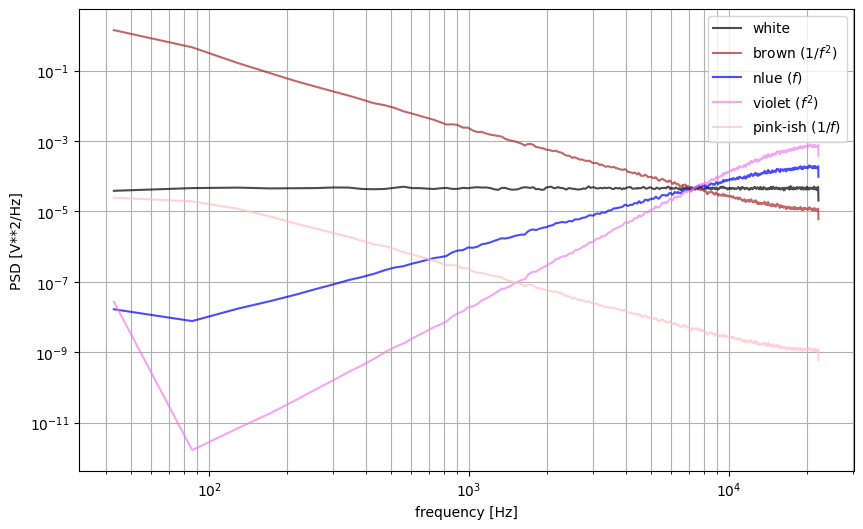

In [6]:
plt.figure(figsize=(10, 6))

f_w, Pxx_w = signal.welch(white, fs, nperseg=1024)
plt.loglog(f_w[1:], Pxx_w[1:], label='white', alpha=0.7, c="black")

f_b, Pxx_b = signal.welch(brown, fs, nperseg=1024)
plt.loglog(f_b[1:], Pxx_b[1:], label='brown ($1/f^2$)', alpha=0.7, c="brown")

f_bl, Pxx_bl = signal.welch(blue, fs, nperseg=1024)
plt.loglog(f_bl[1:], Pxx_bl[1:], label='nlue ($f$)', alpha=0.7, c="blue")

f_v, Pxx_v = signal.welch(violet, fs, nperseg=1024)
plt.loglog(f_v[1:], Pxx_v[1:], label='violet ($f^2$)', alpha=0.7, c="violet")

f_p, Pxx_p = signal.welch(pink, fs, nperseg=1024)
plt.loglog(f_p[1:], Pxx_p[1:], label='pink-ish ($1/f$)', alpha=0.7, c="pink")

plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()
plt.grid(True, which="both")

plt.show()

In [7]:
def hear_noise(color, fs=fs):
    print(f'{str(round(len(color)/fs,2))} seconds of noise!')
    return Audio(color, rate=fs)

In [8]:
hear_noise(pink)

5.0 seconds of noise!
